In [2]:
import numpy as np
import json
import os
import gc
from collections import defaultdict
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import TfidfModel
from gensim import corpora,similarities,matutils
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
%matplotlib inline  

docs = [(doc["id"],(doc["title"]+doc["body"])) for doc in json.load(open(os.path.join("..","similaraty","crag_doc.json"),"r"))]
queries = [(query["query number"],query["query"]) for query in json.load(open(os.path.join("..","similaraty","crag_queries.json"),"r"))][:-1]
#try use dictionaries

docs = { k:v for k,v in docs}
queries = { k:v for k,v in queries}

#remove stop words
#docs = { k:remove_stopwords(v) for k,v in docs}
#queries = { k:remove_stopwords(v) for k,v in queries}

print("Num documents",len(docs),"Num queries",len(queries))




Num documents 1400 Num queries 225


In [3]:

#list of words in the data
dataset_words = set()

for q in queries.values():
    dataset_words |= set(word_tokenize(q))
    
for doc in docs.values():
    dataset_words |= set(word_tokenize(doc))
    
dataset_len_vocabulary = len(dataset_words)


In [4]:
def get_embbedings(file):
    vocabulary = []
    embedding = []

    with open(file) as fp:
        for cnt, line in enumerate(fp):
            if cnt%10000==0:
                print("Processed lines:", cnt, end="\r")
            split_line = line.split("\t")

            if split_line[0] in dataset_words:
                vocabulary.append(split_line[0])
                embedding.append(np.array([float(x) for x in split_line[1:]]))
                
    embedding_matrix = np.vstack(embedding)
    
    model = KeyedVectors(embedding_matrix.shape[1])
    model.add(entities=vocabulary,weights=embedding_matrix)
    model.init_sims(True)
    return model

In [5]:
IN_model = get_embbedings(os.path.join("..","data","in.txt"))
print()
OUT_model = get_embbedings(os.path.join("..","data","out.txt"))

Processed lines: 2740000


In [6]:
IN_model.save_word2vec_format(os.path.join("..","similaraty","CRAG_IN_FROM_BIG_FILE_NLTK_TOKENIZER.bin"),binary=True)
OUT_model.save_word2vec_format(os.path.join("..","similaraty","CRAG_OUT_FROM_BIG_FILE_NLTK_TOKENIZER.bin"),binary=True)

In [7]:
OUT_model.similar_by_word("airplane")

c:\users\asus\anaconda3\envs\bio\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('airplanes', 0.8740481034864753),
 ('plane', 0.867301993365862),
 ('aircraft', 0.8120570488032001),
 ('planes', 0.8073370091932834),
 ('airliner', 0.7865013649468315),
 ('helicopter', 0.7701968659462579),
 ('fuselages', 0.768335336074031),
 ('aeroplane', 0.7613992523960118),
 ('flight', 0.7520362387816977),
 ('ailerons', 0.7507808791975656)]

In [8]:
IN_model.similar_by_word("airplane")

[('plane', 0.8403297571611396),
 ('airplanes', 0.8247849530269218),
 ('planes', 0.7030570762689823),
 ('aircraft', 0.6820166990850205),
 ('helicopter', 0.6575045485904126),
 ('airliner', 0.6474933314145563),
 ('flying', 0.6035460809904593),
 ('aeroplane', 0.5902226205359689),
 ('fuselage', 0.5674462012343071),
 ('ailerons', 0.5581440704373839)]

## PLOTS :)

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
IN_pca_2d_emb = pca.fit_transform(IN_model.vectors)

print(pca.explained_variance_ratio_)

pca = PCA(n_components=2)
#OUT_pca_2d_emb = pca.fit_transform(OUT_model.vectors*2)
OUT_pca_2d_emb = pca.fit_transform(OUT_model.vectors)

print(pca.explained_variance_ratio_)

[0.09261249 0.05413067]
[0.01868891 0.01607207]


In [37]:
IN_X, IN_Y = zip(*IN_pca_2d_emb)
OUT_X, OUT_Y = zip(*(OUT_pca_2d_emb))




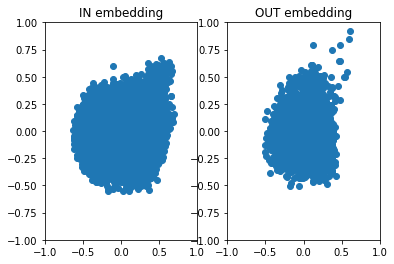

In [38]:
plt.subplot(1, 2, 1)
plt.scatter(IN_X, IN_Y)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('IN embedding')

plt.subplot(1, 2, 2)
plt.scatter(OUT_X, OUT_Y)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('OUT embedding')

plt.show()

(0.01834562957691576,
 -0.03456477546571673,
 -0.028971770359443295,
 0.01990067155726846,
 0.04752140655456476,
 -0.01920332096891054,
 0.045870298414904025,
 0.04322636126070829,
 0.053991551191196696,
 0.007564929305817129,
 0.030594904603803305,
 0.009742605980449378,
 0.032164416388430615,
 0.041087759247969695,
 0.04424616137235886,
 0.002221457142869547,
 -0.015345204992071971,
 -0.026657726512090592,
 0.04061261934740984,
 0.005226655304525535,
 0.032509040974808154,
 0.03530173698975334,
 0.026309943496335614,
 0.01889675492456231,
 0.017759222944262625,
 0.02006975595936739,
 0.01774059960350842,
 -0.08789372766247759,
 0.020818031593746553,
 0.005647729984471665,
 0.07939246617298536,
 0.011348403369975084,
 -0.10193275687082547,
 -0.09795236373370673,
 -0.14846443256360314,
 0.035656647443331135,
 -0.16980470793812086,
 -0.1331967348082506,
 -0.06957794191279677,
 -0.1340808368185012,
 -0.02727431864322847,
 -0.10851545471193282,
 -0.12276003690119565,
 -0.0824346178387155,